<a href="https://colab.research.google.com/github/siglimumuni/Published-Articles/blob/main/Natural_Language_Processing_in_Python_Topic_Modeling_with_Amazon%C2%A0Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
from pycaret.nlp import *
import pandas as pd
import matplotlib.pyplot as plt

#if you're using google colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Loading the data

In [11]:
#read in the data
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/amazon_reviews.csv")
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5.0,True,"02 3, 2018",A3CQA9S058SZST,B0002KRC5Y,Mark,Finally got to install. Well made.,Well made,1517616000,NaN,NaN,NaN
1,1.0,True,"08 23, 2016",ALXF51DVG99XV,9791151504,Amazon Customer,I buy it for my htc one m7 the first week i wa...,Very bad,1471910400,NaN,NaN,NaN
2,2.0,False,"04 5, 2015",ATRSCEZSJDCVD,9837282037,MPICKS,I received this charger case and was so excite...,Honest review!,1428192000,3.0,NaN,NaN
3,1.0,True,"10 21, 2016",A2PHRHLDR4VOXA,9707716371,damond whitmore,It does not last throughout the day.....It was...,Don't waste your money,1477008000,NaN,NaN,NaN
4,3.0,True,"08 22, 2015",A1IOKQ8K2QS86B,8288878881,sunshinejean,ok,Three Stars,1440201600,NaN,NaN,NaN


In [13]:
#drop unwanted columns
df = df[["reviewerID","reviewText"]]
df.head()

,reviewerID,reviewText
0,A3CQA9S058SZST,Finally got to install. Well made.
1,ALXF51DVG99XV,I buy it for my htc one m7 the first week i wa...
2,ATRSCEZSJDCVD,I received this charger case and was so excite...
3,A2PHRHLDR4VOXA,It does not last throughout the day.....It was...
4,A1IOKQ8K2QS86B,ok


# Setting up the environment

In [14]:
#setting up the environment
amazon_reviews = setup(data = df, target = 'reviewText',session_id=111)

Description,Value
session_id,111
Documents,13000
Vocab Size,13642
Custom Stopwords,False


# Creating the topic model

In [15]:
#creating an LDA topic model
lda = create_model('lda',num_topics=3, multi_core=True)
print(lda)

LdaModel(num_terms=13642, num_topics=3, decay=0.5, chunksize=100)


# Assigning the model

In [16]:
#assigning the model
amazon_topics = assign_model(lda)
amazon_topics.head()

,reviewerID,reviewText,Topic_0,Topic_1,Topic_2,Dominant_Topic,Perc_Dominant_Topic
0,A3CQA9S058SZST,finally get install well make,0.063237,0.066976,0.869787,Topic 2,0.87
1,ALXF51DVG99XV,buy first week love charger second week almost...,0.068548,0.179439,0.752012,Topic 2,0.75
2,ATRSCEZSJDCVD,receive case review phone automatically charge...,0.249251,0.008602,0.742147,Topic 2,0.74
3,A2PHRHLDR4VOXA,last day big,0.296433,0.090718,0.612848,Topic 2,0.61
4,A1IOKQ8K2QS86B,,0.333333,0.333333,0.333333,Topic 0,0.33


# Plotting the model

In [20]:
#plotting the model
plot_model()

In [21]:
#plot most frequent bigrams
plot_model(plot='bigram')

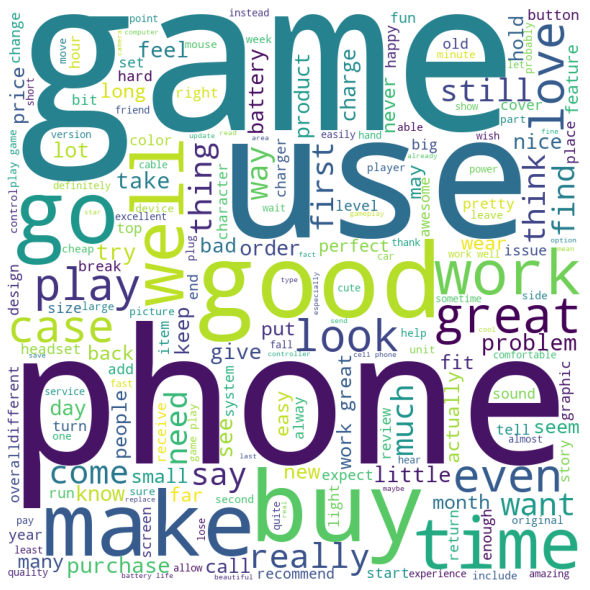

In [23]:
#plotting a wordcloud
plot_model(plot='wordcloud')

In [31]:
#plotting the sentiment polarity
plot_model(lda, plot="sentiment")

In [24]:
#plotting topic distribution
plot_model(lda,plot = 'topic_distribution')

In [17]:
#plot most frequent words for topic 0
plot_model(lda,plot = 'frequency', topic_num = 'Topic 0')

In [18]:
#plot most frequent words for topic 1
plot_model(lda,plot = 'frequency', topic_num = 'Topic 1')

In [19]:
#plot most frequent words for topic 2
plot_model(lda,plot = 'frequency', topic_num = 'Topic 2')

# Saving and Loading a model

In [33]:
#saving the model
save_model(lda,'amazon_reviews_topics')

Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x7fdc863645d0>,
 'amazon_reviews_topics.pkl')

In [34]:
#loading a saved model
amazon_reviews_topics = load_model('amazon_reviews_topics')
print(amazon_reviews_topics)

Model Sucessfully Loaded
LdaModel(num_terms=13642, num_topics=3, decay=0.5, chunksize=100)
